# Predict Password Strength

# 1. Data Collection

In [1]:
#Importing necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Ignore warnings
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

#Importing SHAP(XAI)
import shap
shap.initjs()

In [2]:
conn = sqlite3.connect('Datasets/password_data.sqlite')
data = pd.read_sql_query("SELECT * FROM Users" ,conn)

In [3]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [4]:
data.shape

(100000, 3)

# 2. Data Cleaning

In [5]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [6]:
# Removing irrelevant columns
data = data.drop('index', axis = 1)

In [7]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [8]:
# Check duplicated data or duplicate rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
# Check missing data
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [11]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [12]:
data.isnull().any().sum()

np.int64(0)

In [13]:
# Check data types of every feature
data.dtypes

password    object
strength     int64
dtype: object

In [14]:
# Check if strength has any others irrelerant values
data['strength']

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [15]:
data['strength'].unique()

array([1, 2, 0])

# 3. Semantic Analysis

In [16]:
data.columns

Index(['password', 'strength'], dtype='object')

In [17]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [18]:
data['password'][0]

'zxe870819'

In [19]:
type(data['password'][0])
#This is a string types so we can operate with the strings function

str

In [20]:
# Ask some questions to do semantic analysis
# 1-) How many password textual actually holds only numeric characters ?

In [21]:
data["password"].str

In [22]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [23]:
data["password"].str.isnumeric().sum()

np.int64(26)

In [24]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [25]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [26]:
# 2-) How many password textual actually holds only Upper-case character ?
data["password"].str.isupper()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [27]:
data["password"].str.isupper().sum()

np.int64(1506)

In [28]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [29]:
data[data["password"].str.isupper()].shape

(1506, 2)

In [30]:
# 3-) How many password textual actually holds only alphabet

In [31]:
data["password"].str.isalpha()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [32]:
data["password"].str.isalpha().sum()

np.int64(50)

In [33]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [34]:
data[data["password"].str.isalpha()].shape

(50, 2)

In [35]:
# 4-)  How many password textual actually holds alpha-numeric character ?

In [36]:
data["password"].str.isalnum()

0         True
1         True
2         True
3        False
4         True
         ...  
99995     True
99996     True
99997     True
99998     True
99999     True
Name: password, Length: 100000, dtype: bool

In [37]:
data["password"].str.isalnum().sum()

np.int64(97203)

In [38]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [39]:
data[data["password"].str.isalnum()].shape

(97203, 2)

In [40]:
# 5-) How many password textual actually holds title-case character ?

In [41]:
data["password"].str.istitle()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [42]:
data["password"].str.istitle().sum()

np.int64(932)

In [43]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [44]:
data[data["password"].str.istitle()].shape

(932, 2)

In [45]:
# 6-) How many password textual actually holds special character ?

In [46]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [47]:
# A package with special characters defined
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
# A function that returns 1 if it contains a special character

def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [49]:
data["password"].apply(find_semantics)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [50]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [51]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [52]:
(data["password"].apply(find_semantics)==1).sum()

np.int64(2663)

In [53]:
data[data["password"].apply(find_semantics)==1].shape

(2663, 2)

# 4. Feature Engineering

In [54]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [55]:
# length of every Password

In [56]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [57]:
data["password"][0]

'zxe870819'

In [58]:
len(data["password"][0])

9

In [59]:
data["password"].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [60]:
data["length"] = data["password"].str.len()
data["length"]

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: length, Length: 100000, dtype: int64

In [61]:
# Frequency of Lowercase Characters :

In [62]:
password = "Lukaku0079"

In [63]:
[char for char in password if char.islower()]

['u', 'k', 'a', 'k', 'u']

In [64]:
len([char for char in password if char.islower()])

5

In [65]:
len([char for char in password if char.islower()]) / len(password)

0.5

In [66]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [67]:
# Frequency of Uppercase Characters

In [68]:
[char for char in password if char.isupper()]

['L']

In [69]:
len([char for char in password if char.isupper()])

1

In [70]:
len([char for char in password if char.islower()]) / len(password)

0.5

In [71]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [72]:
# Frequency of Numeric Characters 

In [73]:
[char for char in password if char.isdigit()]

['0', '0', '7', '9']

In [74]:
len([char for char in password if char.isdigit()])

4

In [75]:
len([char for char in password if char.isdigit()]) / len(password)

0.4

In [76]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [77]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [78]:
# Frequency of Special-case Characters 

In [79]:
def freq_special_case(row):
    special_chars = [] 
    for char in row:
        if not char.isalpha() and not char.isdigit(): 
            special_chars.append(char) 
    return len(special_chars)

In [80]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)

In [81]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [82]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [83]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


# 5. Data Analysis

In [84]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [85]:
# "length" - "Strength" Analysis
data[["length" , "strength"]]

,length,strength
0,9,1
1,12,1
2,9,1
3,23,2
4,8,1
...,...,...
99995,10,1
99996,10,1
99997,9,1
99998,9,1


In [86]:
data[["length" , "strength"]].groupby("strength").agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [87]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

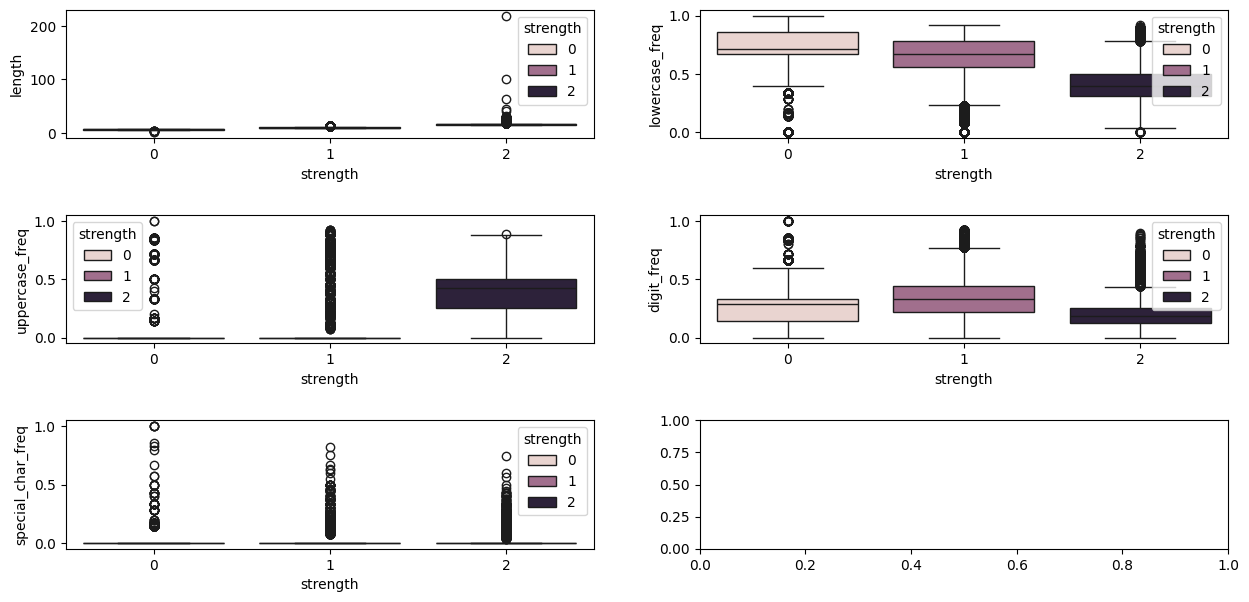

In [88]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))
sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

# 6. Feature Importance

In [89]:
data[data['strength']==0]

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
20,dtc5aoy,0,7,0.857,0.0,0.143,0.0
47,paxton0,0,7,0.857,0.0,0.143,0.0
49,joskes9,0,7,0.857,0.0,0.143,0.0
81,saber50,0,7,0.714,0.0,0.286,0.0
91,ficko69,0,7,0.714,0.0,0.286,0.0
...,...,...,...,...,...,...,...
99977,1990pe,0,6,0.333,0.0,0.667,0.0
99979,chbgj12,0,7,0.714,0.0,0.286,0.0
99981,wnpci8,0,6,0.833,0.0,0.167,0.0
99984,sayda82,0,7,0.714,0.0,0.286,0.0


In [90]:
data[data['strength']==0]["length"]

20       7
47       7
49       7
81       7
91       7
        ..
99977    6
99979    7
99981    6
99984    7
99986    6
Name: length, Length: 13622, dtype: int64

In [91]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    
    plt.legend()
    plt.show()

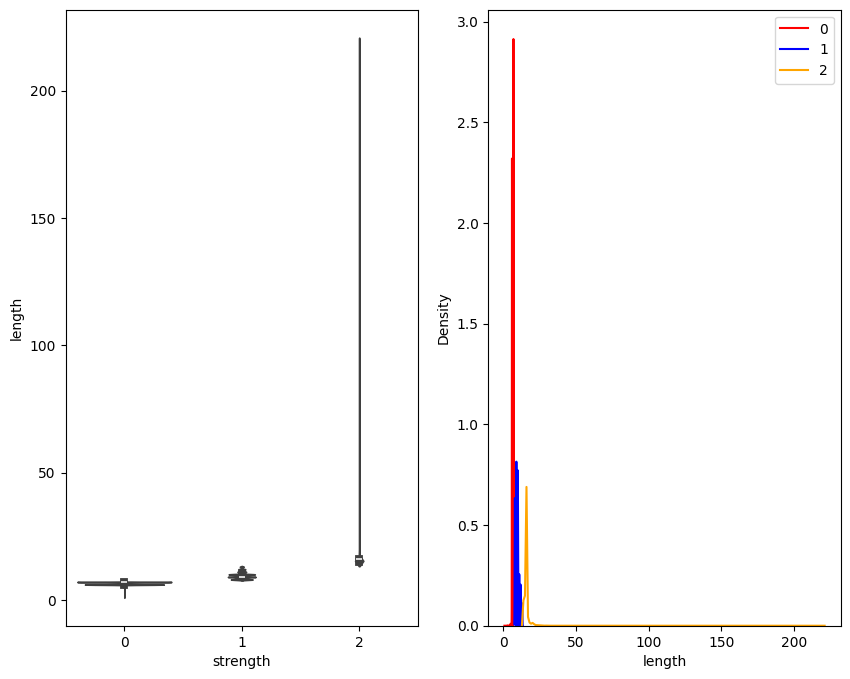

In [92]:
get_dist(data , "length")

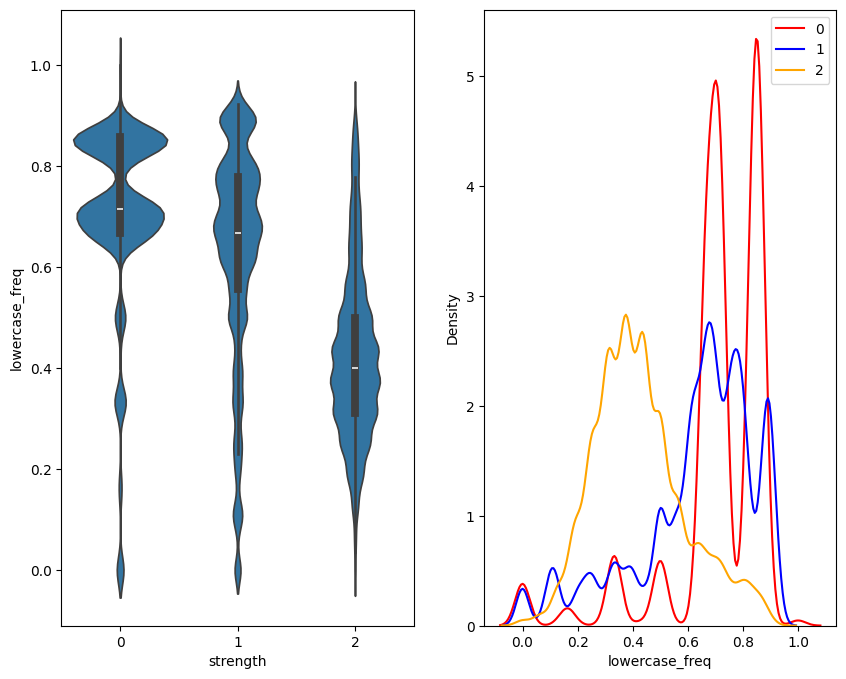

In [93]:
get_dist(data , 'lowercase_freq')

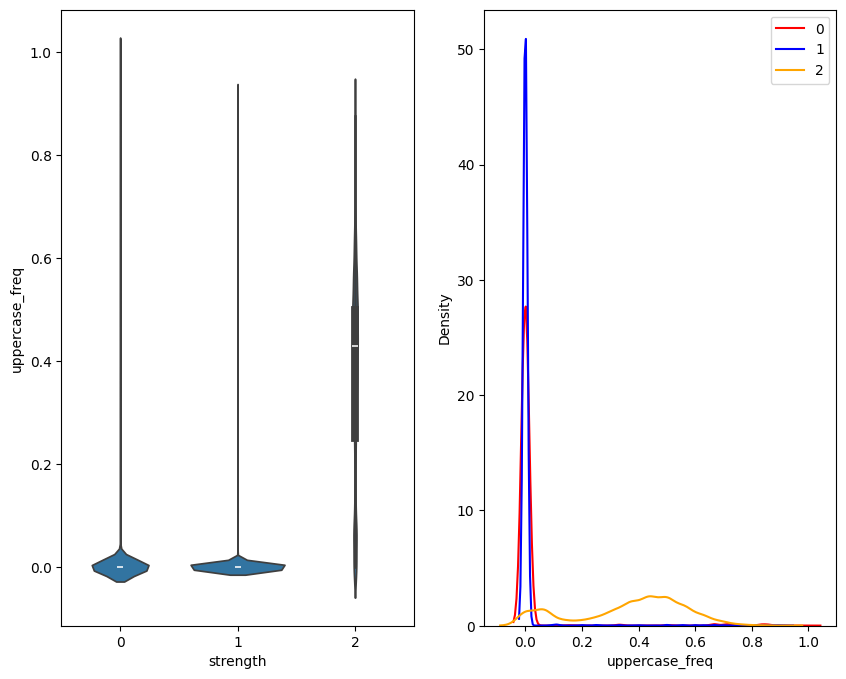

In [94]:
get_dist(data , 'uppercase_freq')

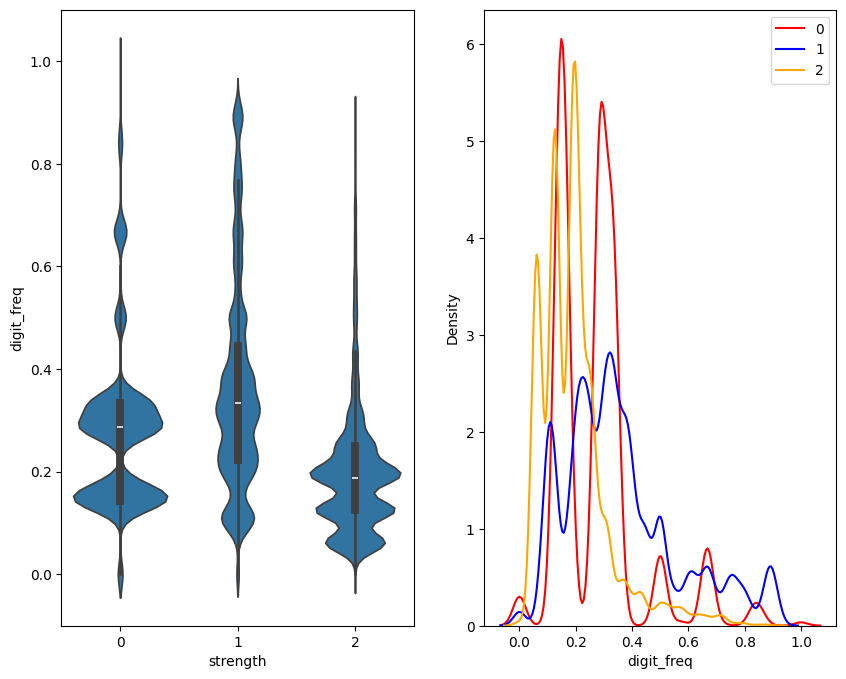

In [95]:
get_dist(data , 'digit_freq')

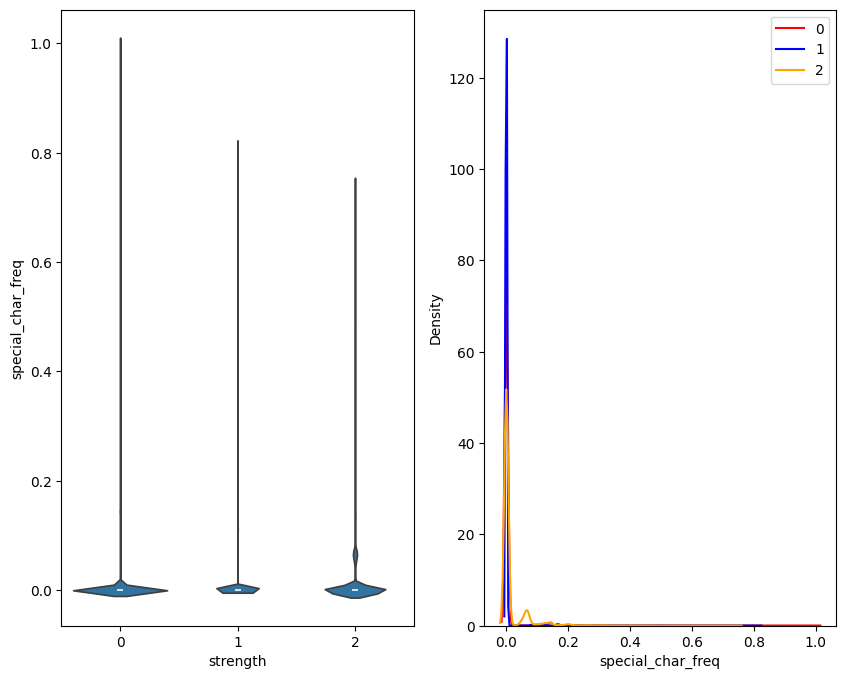

In [96]:
get_dist(data , 'special_char_freq')

# 7. Apply TF-IDF on data

In [97]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [98]:
data.sample(frac=1)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
5758,assunaro87,1,10,0.800,0.000,0.200,0.0
59050,as185022,1,8,0.250,0.000,0.750,0.0
32451,mama55,0,6,0.667,0.000,0.333,0.0
42652,fvv1d1sjxf,1,10,0.800,0.000,0.200,0.0
72025,pratama25,1,9,0.778,0.000,0.222,0.0
...,...,...,...,...,...,...,...
487,metro5000,1,9,0.556,0.000,0.444,0.0
93138,PbIPYsjc3OQT5Q3l,2,16,0.312,0.500,0.188,0.0
65202,semmi123,1,8,0.625,0.000,0.375,0.0
11327,sUhTdIjkyOQ0F430,2,16,0.375,0.375,0.250,0.0


In [99]:
dataframe = data.sample(frac=1)
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
34572,ladito1,0,7,0.857,0.0,0.143,0.000
44862,hgr8cdrj12,1,10,0.700,0.0,0.300,0.000
52816,longrun@,1,8,0.875,0.0,0.000,0.125
69363,sacha500,1,8,0.625,0.0,0.375,0.000
10773,worlds18,1,8,0.750,0.0,0.250,0.000
...,...,...,...,...,...,...,...
17952,vpsoeaf259,1,10,0.700,0.0,0.300,0.000
80233,14sm2oao,1,8,0.625,0.0,0.375,0.000
30228,pasming3,1,8,0.875,0.0,0.125,0.000
18264,syhul987,1,8,0.625,0.0,0.375,0.000


# 8. Apply NLP

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="char")

In [101]:
list(dataframe["password"])

['ladito1',
 'hgr8cdrj12',
 'longrun@',
 'sacha500',
 'worlds18',
 'QWE123ZXC',
 'baturaja12',
 'aufmorpzl496',
 'Jc0CtfTE5NgU0Ybk',
 'sognare123',
 'HE5hNLjUxOQlzlLA',
 'kampang08',
 '80053599y',
 'fkqdiwu98',
 'atrijum93',
 'erdelli123',
 'nothings1234',
 'ozjpcwft5',
 'ecah89',
 'raut9h3',
 'rewaj594',
 'pyvokic768',
 'arcos0427',
 'bandara44',
 'sigtau12',
 'tanayrizal123',
 'untuksemua1',
 'bankss72',
 'afiwOQYvUKA177',
 '8026269za',
 '83KRBVEZ',
 'kingilingi5',
 'ijgm9p9u',
 'lilo852789',
 'SCOBBYDOO49',
 'wowemu155234',
 'seah11',
 'mobile2345672',
 'v83qv3y62',
 'darashetty00',
 'haycolen1',
 'rosopa690',
 'unknown8',
 'infinite12',
 'vlad204210',
 'centrin2',
 'KB9PC1566',
 'proper1',
 'vivek1511',
 'zaide1',
 'QnXWlEDI1NAdq0No',
 'cenation655',
 'marius05',
 'A13101993',
 '188NIWoDykaDeg',
 'mfb0728260706',
 '07febrero1995',
 'goel70',
 '5family',
 '8ut8pbghi',
 'chiky123',
 'junky1993',
 'condeea1666',
 'kalayan55',
 'amisha123',
 'exisuk355',
 'Matias82017903',
 'elpp0lavgc

In [102]:
x = list(dataframe["password"])
x

['ladito1',
 'hgr8cdrj12',
 'longrun@',
 'sacha500',
 'worlds18',
 'QWE123ZXC',
 'baturaja12',
 'aufmorpzl496',
 'Jc0CtfTE5NgU0Ybk',
 'sognare123',
 'HE5hNLjUxOQlzlLA',
 'kampang08',
 '80053599y',
 'fkqdiwu98',
 'atrijum93',
 'erdelli123',
 'nothings1234',
 'ozjpcwft5',
 'ecah89',
 'raut9h3',
 'rewaj594',
 'pyvokic768',
 'arcos0427',
 'bandara44',
 'sigtau12',
 'tanayrizal123',
 'untuksemua1',
 'bankss72',
 'afiwOQYvUKA177',
 '8026269za',
 '83KRBVEZ',
 'kingilingi5',
 'ijgm9p9u',
 'lilo852789',
 'SCOBBYDOO49',
 'wowemu155234',
 'seah11',
 'mobile2345672',
 'v83qv3y62',
 'darashetty00',
 'haycolen1',
 'rosopa690',
 'unknown8',
 'infinite12',
 'vlad204210',
 'centrin2',
 'KB9PC1566',
 'proper1',
 'vivek1511',
 'zaide1',
 'QnXWlEDI1NAdq0No',
 'cenation655',
 'marius05',
 'A13101993',
 '188NIWoDykaDeg',
 'mfb0728260706',
 '07febrero1995',
 'goel70',
 '5family',
 '8ut8pbghi',
 'chiky123',
 'junky1993',
 'condeea1666',
 'kalayan55',
 'amisha123',
 'exisuk355',
 'Matias82017903',
 'elpp0lavgc

In [103]:
X = vectorizer.fit_transform(x)

In [104]:
X.shape

(100000, 99)

In [105]:
dataframe["password"].shape

(100000,)

In [106]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 842571 stored elements and shape (100000, 99)>

In [107]:
X.toarray() 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30726312, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.29590541, 0.        , 0.        ,
       0.44569461, 0.        , 0.        , 0.        , 0.        ,
       0.35920468, 0.        , 0.        , 0.42670293, 0.        ,
       0.        , 0.36359878, 0.        , 0.        , 0.        ,
       0.        , 0.41961675, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [109]:
dataframe["password"]

34572       ladito1
44862    hgr8cdrj12
52816      longrun@
69363      sacha500
10773      worlds18
            ...    
17952    vpsoeaf259
80233      14sm2oao
30228      pasming3
18264      syhul987
63556    1ydet5xer8
Name: password, Length: 100000, dtype: object

In [110]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [111]:
len(vectorizer.get_feature_names_out())

99

In [112]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df2.iloc[:, 20:50]

,0,1,2,3,4,5,6,7,8,9,...,_,`,a,b,c,d,e,f,g,h
0,0.000000,0.307263,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.295905,0.0,0.000000,0.445695,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.208565,0.241300,0.000000,0.00000,0.000000,0.0,0.000000,0.305325,0.000000,...,0.0,0.0,0.000000,0.0,0.314604,0.302530,0.000000,0.000000,0.318835,0.324180
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.294685,0.000000
3,0.597808,0.000000,0.000000,0.000000,0.00000,0.332166,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.441675,0.0,0.345901,0.000000,0.000000,0.000000,0.000000,0.356430
4,0.000000,0.260550,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.381427,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.377935,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0.000000,0.262878,0.000000,0.00000,0.329127,0.0,0.000000,0.000000,0.317681,...,0.0,0.0,0.218817,0.0,0.000000,0.000000,0.256335,0.399933,0.000000,0.000000
99996,0.000000,0.263459,0.304809,0.000000,0.37694,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.253720,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99997,0.000000,0.000000,0.000000,0.348014,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.258645,0.0,0.000000,0.000000,0.000000,0.000000,0.410568,0.000000
99998,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.370997,0.359479,0.343326,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.381679


# 9. Logistic Regression

In [114]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [115]:
df2.head()

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625


In [116]:
y = dataframe["strength"]
y

34572    0
44862    1
52816    1
69363    1
10773    1
        ..
17952    1
80233    1
30228    1
18264    1
63556    1
Name: strength, Length: 100000, dtype: int64

In [117]:
# split data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [118]:
X_train.shape

(80000, 101)

In [119]:
y_train.shape

(80000,)

In [120]:
# Applying Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
clf = LogisticRegression(multi_class="multinomial")

In [123]:
clf.fit(X_train , y_train) #train my model

LogisticRegression(multi_class='multinomial')

In [124]:
y_pred = clf.predict(X_test)

In [125]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
from collections import Counter

In [127]:
Counter(y_pred)

Counter({np.int64(1): 16955, np.int64(2): 1776, np.int64(0): 1269})

# 10.Make prediction with user-entered input

In [128]:
password = "%@123abcd"

In [129]:
sample_array = np.array([password])

In [130]:
sample_array

array(['%@123abcd'], dtype='<U9')

In [131]:
sample_matrix = vectorizer.transform(sample_array)

In [132]:
sample_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (1, 99)>

In [133]:
type(sample_matrix)

scipy.sparse._csr.csr_matrix

In [134]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [135]:
sample_matrix.toarray().shape

(1, 99)

In [136]:
len(password)

9

In [137]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [138]:
np.append(sample_matrix.toarray() , (9, 0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [139]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [140]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [141]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [142]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [143]:
clf.predict(new_matrix)

array([0])

In [144]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    
    sample_matrix = vectorizer.transform(sample_array) 
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [145]:
predict()

Enter a password :  haha


'Password is weak'

# 11. Model evaluation

In [146]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [147]:
accuracy_score(y_test , y_pred)

0.8006

In [148]:
confusion_matrix(y_test , y_pred)

array([[  662,  2039,     1],
       [  542, 13909,   334],
       [   65,  1007,  1441]])

In [149]:
# Create report of your model
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.52      0.25      0.33      2702
           1       0.82      0.94      0.88     14785
           2       0.81      0.57      0.67      2513

    accuracy                           0.80     20000
   macro avg       0.72      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000



In [150]:
#saving each model as a pickle file
import pickle
pickle.dump(clf, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Models\clf.pkl', 'wb')) #where the model is saved
pickle.dump(vectorizer, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Models\vectorizer.pkl', 'wb')) #where the model is saved
#C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Models
# Lưu mô hình đã huấn luyện vào tệp

# 12. SHAP

In [151]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer.shap_values(X_test)

In [152]:
feature_names = list(X_test) 

In [153]:
print("Shape of shap_values:", shap_values[:, :, :].shape)
print("Shape of X_test:", X_test.shape)
print("Length of feature_names:", len(feature_names))

Shape of shap_values: (20000, 101, 3)
Shape of X_test: (20000, 101)
Length of feature_names: 101


In [154]:
#Lưu các biến khác
pickle.dump(X_train, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\X_train.pkl', 'wb')) 
pickle.dump(X_test, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\X_test.pkl', 'wb'))
pickle.dump(y_train, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\y_train.pkl', 'wb')) 
pickle.dump(y_test, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\y_test.pkl', 'wb'))
pickle.dump(y_pred, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\y_pred.pkl', 'wb')) 
#Lưu các biến của SHAP
pickle.dump(explainer, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\explainer.pkl', 'wb')) 
pickle.dump(shap_values, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\shap_values.pkl', 'wb')) 
pickle.dump(feature_names, open(r'C:\Users\asus\OneDrive - Trường ĐH CNTT - University of Information Technology\VISUAL STUDIO CODE\PYTHON\IE105\Streamlit IE105\Web_page\Variable\feature_names.pkl', 'wb')) 


In [155]:
shap_values[:, :, :]

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.        , -0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        , -0.        , -0.        ],
        [-0.02098178,  0.02068717,  0.00029461],
        [-0.15698755,  0.08121655,  0.07577101]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.        , -0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        , -0.        , -0.        ],
        [-0.02098178,  0.02068717,  0.00029461],
        [-0.10729585,  0.05550885,  0.051787  ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.        , -0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        , -0.        , -0.        ],
        [ 0.07024334, -0.06925704, -0.0009863 ],
        [-0.11548679,  0.05974638,  0.05574041]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

In [156]:
feature_names

['\x04',
 '\x06',
 '\x08',
 '\x0e',
 '\x10',
 '\x11',
 '\x17',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '¡',
 '¨',
 '°',
 '±',
 '³',
 '´',
 'µ',
 '·',
 'ß',
 'à',
 'á',
 'ä',
 'æ',
 'ç',
 'é',
 'ê',
 'í',
 'ñ',
 'ó',
 'õ',
 'ö',
 '÷',
 'ú',
 'ü',
 'ý',
 'þ',
 '›',
 'length',
 'lowercase_freq']

In [157]:
#shap.summary_plot(shap_values[:, :, 2], X_test,feature_names = feature_names, max_display = 10)

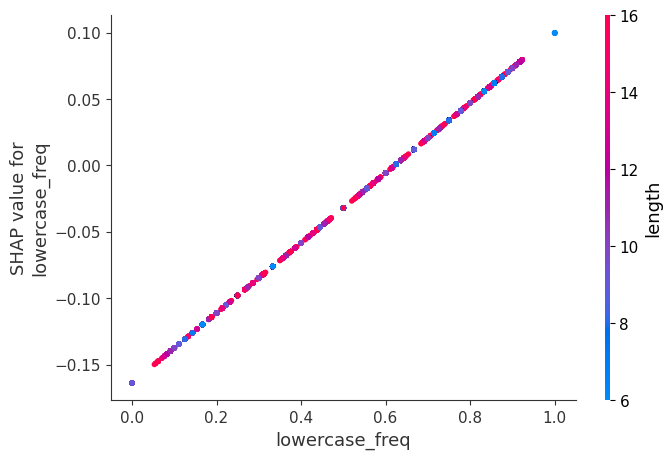

In [158]:
shap.dependence_plot('lowercase_freq', shap_values[:,:,2], X_test)

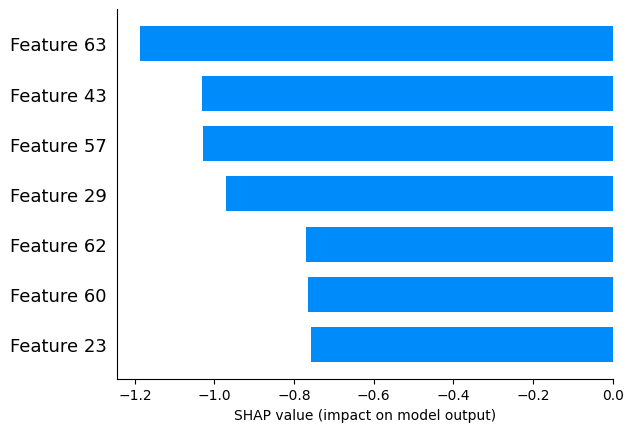

In [159]:
shap.bar_plot(shap_values[2,:,0])

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict and evaluate
predictions_dt = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, predictions_dt))
print("Classification Report:\n", classification_report(y_test, predictions_dt))

Decision Tree Accuracy: 0.8908
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      2702
           1       0.93      0.93      0.93     14785
           2       0.81      0.81      0.81      2513

    accuracy                           0.89     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.89      0.89      0.89     20000



In [161]:
y_pred = dtree.predict(X_test)

In [162]:
y_pred

array([2, 1, 1, ..., 1, 1, 1])

In [163]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
predictions_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, predictions_rf))
print("Classification Report:\n", classification_report(y_test, predictions_rf))

Random Forest Accuracy: 0.93295
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.70      0.80      2702
           1       0.93      0.99      0.96     14785
           2       0.96      0.88      0.91      2513

    accuracy                           0.93     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.93      0.93      0.93     20000



In [166]:
y_pred = rf.predict(X_test)

In [167]:
y_pred

array([2, 1, 1, ..., 1, 1, 1])

In [168]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # 'rbf' kernel for non-linear decision boundaries
svm_model.fit(X_train, y_train)

# Predict and evaluate
predictions_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, predictions_svm))
print("Classification Report:\n", classification_report(y_test, predictions_svm))

SVM Accuracy: 0.78285
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2702
           1       0.78      0.99      0.87     14785
           2       0.88      0.40      0.55      2513

    accuracy                           0.78     20000
   macro avg       0.55      0.46      0.47     20000
weighted avg       0.68      0.78      0.71     20000



In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
y_pred

In [165]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Define a simple feed-forward neural network
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model on test data
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Neural Network Accuracy:", accuracy)

In [ ]:
y_pred = model.predict(X_test)